In [9]:
# library import

# Numerical Operations
import math
import numpy as np

# Reading/Writing Data
import pandas as pd
import os
import csv

from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator, FormatStrFormatter, PercentFormatter
import seaborn as sns

In [10]:
train_data, test_data = pd.read_csv('./data/covid_train.csv'), pd.read_csv('./data/covid_test.csv')

In [11]:
print(str(train_data.columns))

Index(['id', 'AL', 'AZ', 'CA', 'CO', 'CT', 'FL', 'GA', 'IL', 'IN', 'IA', 'KS',
       'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MO', 'NJ', 'NM', 'NY', 'NC',
       'OH', 'OK', 'OR', 'PA', 'SC', 'TN', 'TX', 'VA', 'WA', 'WV', 'WI', 'cli',
       'ili', 'wnohh_cmnty_cli', 'wbelief_masking_effective',
       'wbelief_distancing_effective', 'wcovid_vaccinated_friends',
       'wlarge_event_indoors', 'wothers_masked_public',
       'wothers_distanced_public', 'wshop_indoors', 'wrestaurant_indoors',
       'wworried_catch_covid', 'hh_cmnty_cli', 'nohh_cmnty_cli',
       'wearing_mask_7d', 'public_transit', 'worried_finances',
       'tested_positive', 'cli.1', 'ili.1', 'wnohh_cmnty_cli.1',
       'wbelief_masking_effective.1', 'wbelief_distancing_effective.1',
       'wcovid_vaccinated_friends.1', 'wlarge_event_indoors.1',
       'wothers_masked_public.1', 'wothers_distanced_public.1',
       'wshop_indoors.1', 'wrestaurant_indoors.1', 'wworried_catch_covid.1',
       'hh_cmnty_cli.1', 'nohh

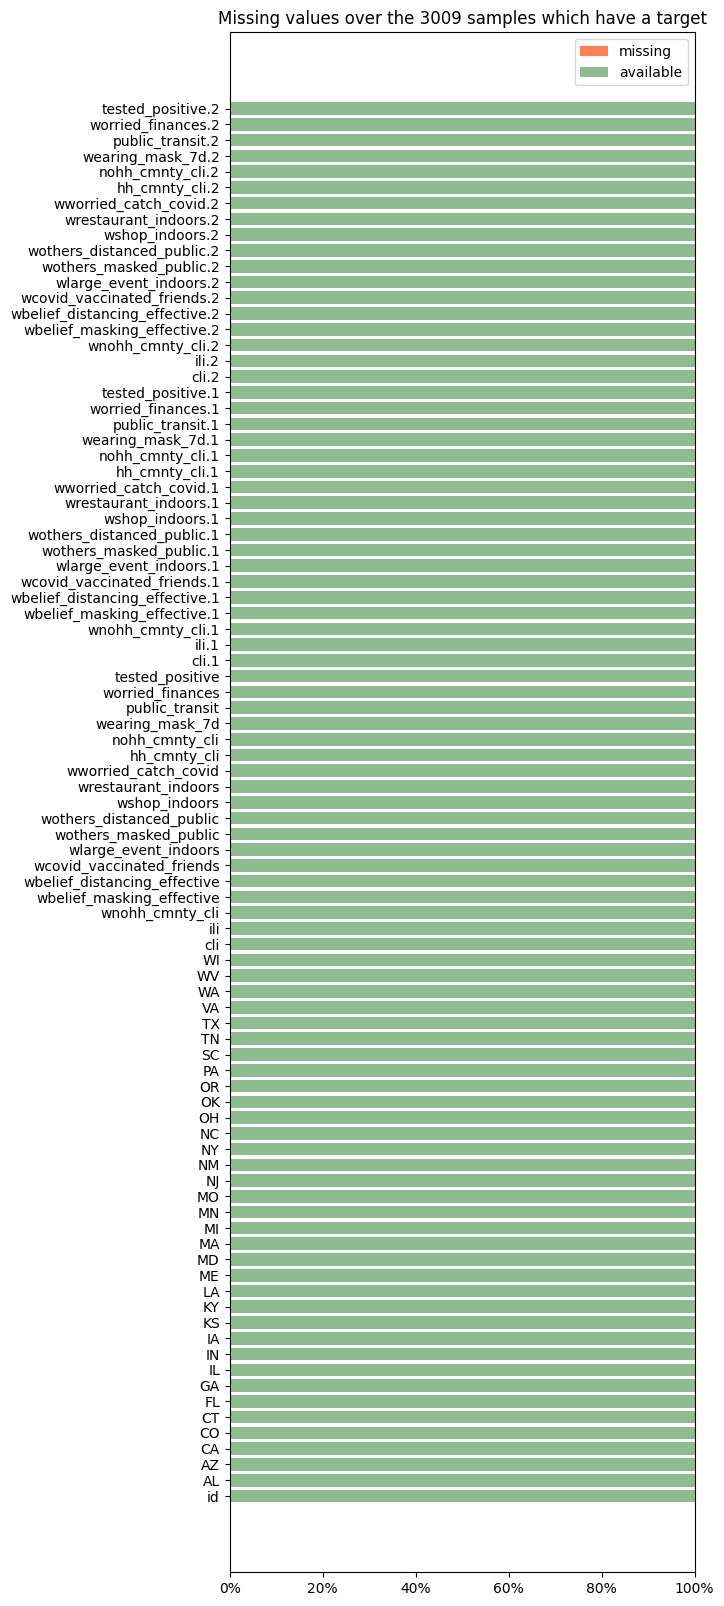

In [13]:
supervised_usable = train_data[train_data['tested_positive.2'].notna()]

# Calculate the number of missing values for each column
missing_count = (
    supervised_usable
    .isnull()
    .sum()
    .reset_index()
    .rename(columns={'index': 'feature', 0: 'null_count'})
)

# Compute the ratio of missing values for each column
missing_count['null_ratio'] = missing_count['null_count'] / len(supervised_usable)
# Sort the columns by missing ratio in descending order
missing_count = missing_count.sort_values('null_ratio', ascending=False).reset_index(drop=True)

plt.figure(figsize=(6, 20))
plt.title(f'Missing values over the {len(supervised_usable)} samples which have a target')

plt.barh(
    np.arange(len(missing_count)),
    missing_count['null_ratio'],
    color='coral',
    label='missing'
)
plt.barh(
    np.arange(len(missing_count)),
    1 - missing_count['null_ratio'],
    left=missing_count['null_ratio'],
    color='darkseagreen',
    label='available'
)
plt.yticks(np.arange(len(missing_count)), missing_count['feature'])
plt.gca().xaxis.set_major_formatter(PercentFormatter(xmax=1, decimals=0))
plt.xlim(0, 1)
plt.legend()
plt.show()

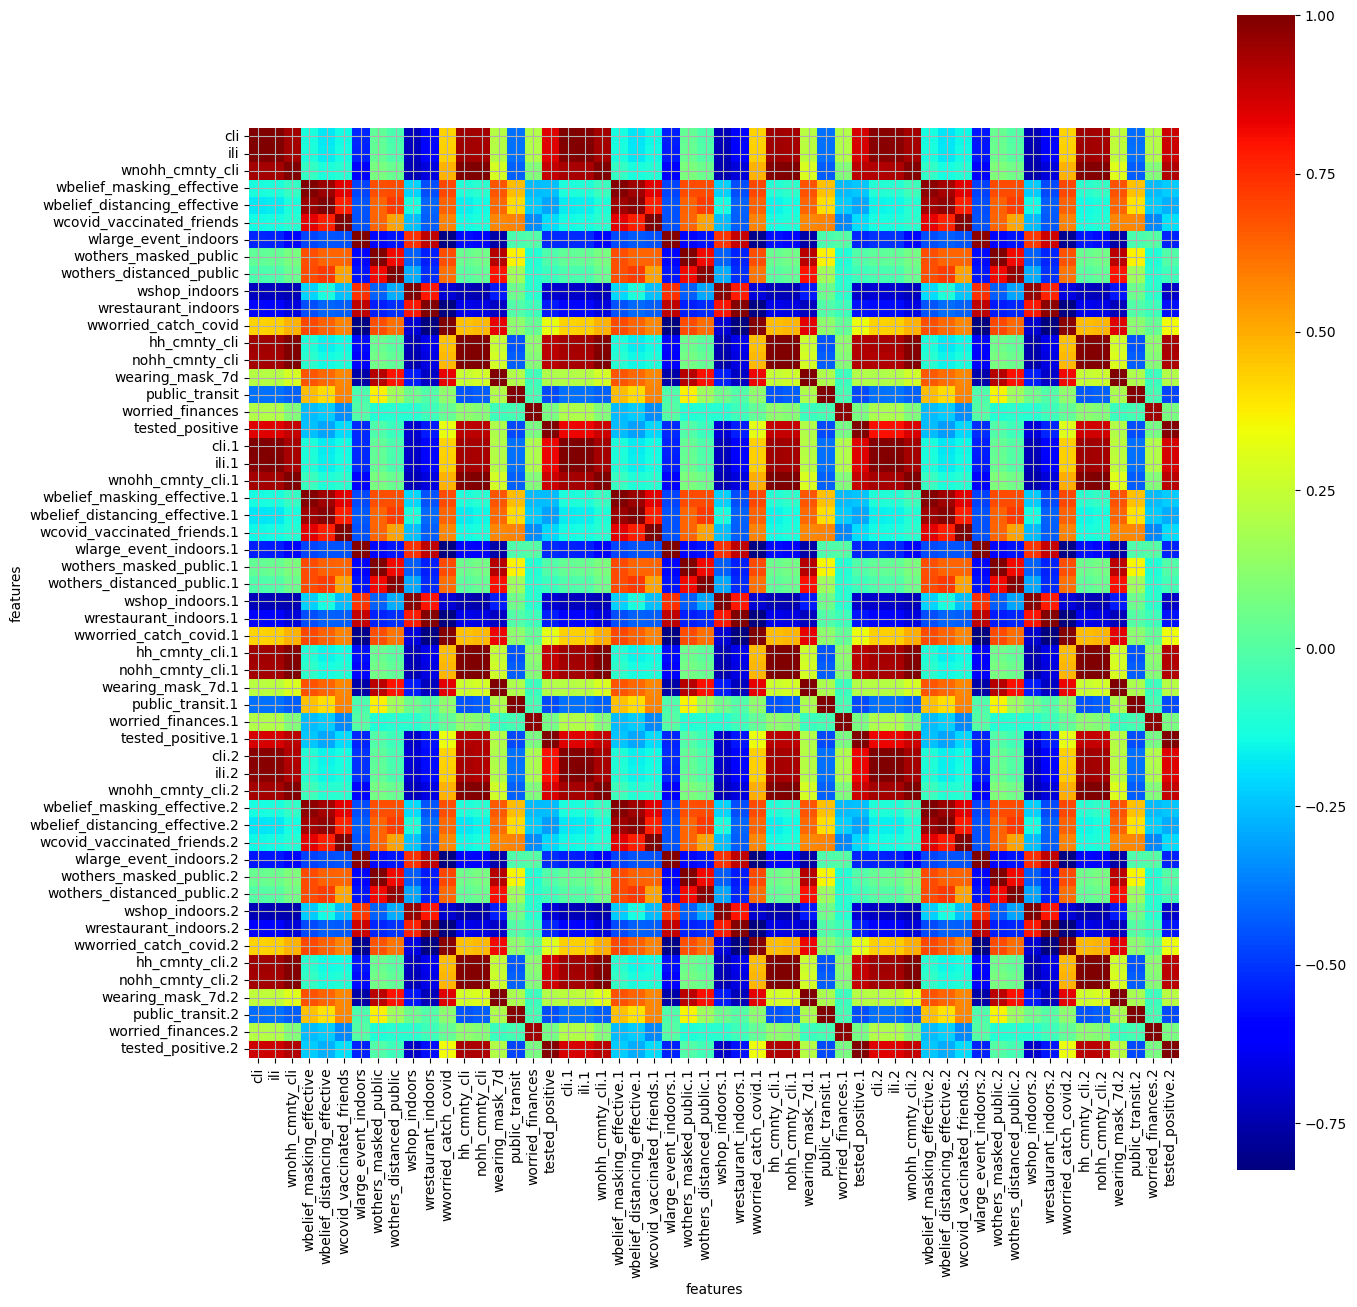

In [21]:
plt.figure(figsize=(15, 15))
sns.heatmap(train_data.iloc[:,35:].corr(), square=True, cmap="jet")
plt.xlabel("features")
plt.ylabel("features")
plt.grid()
plt.show()

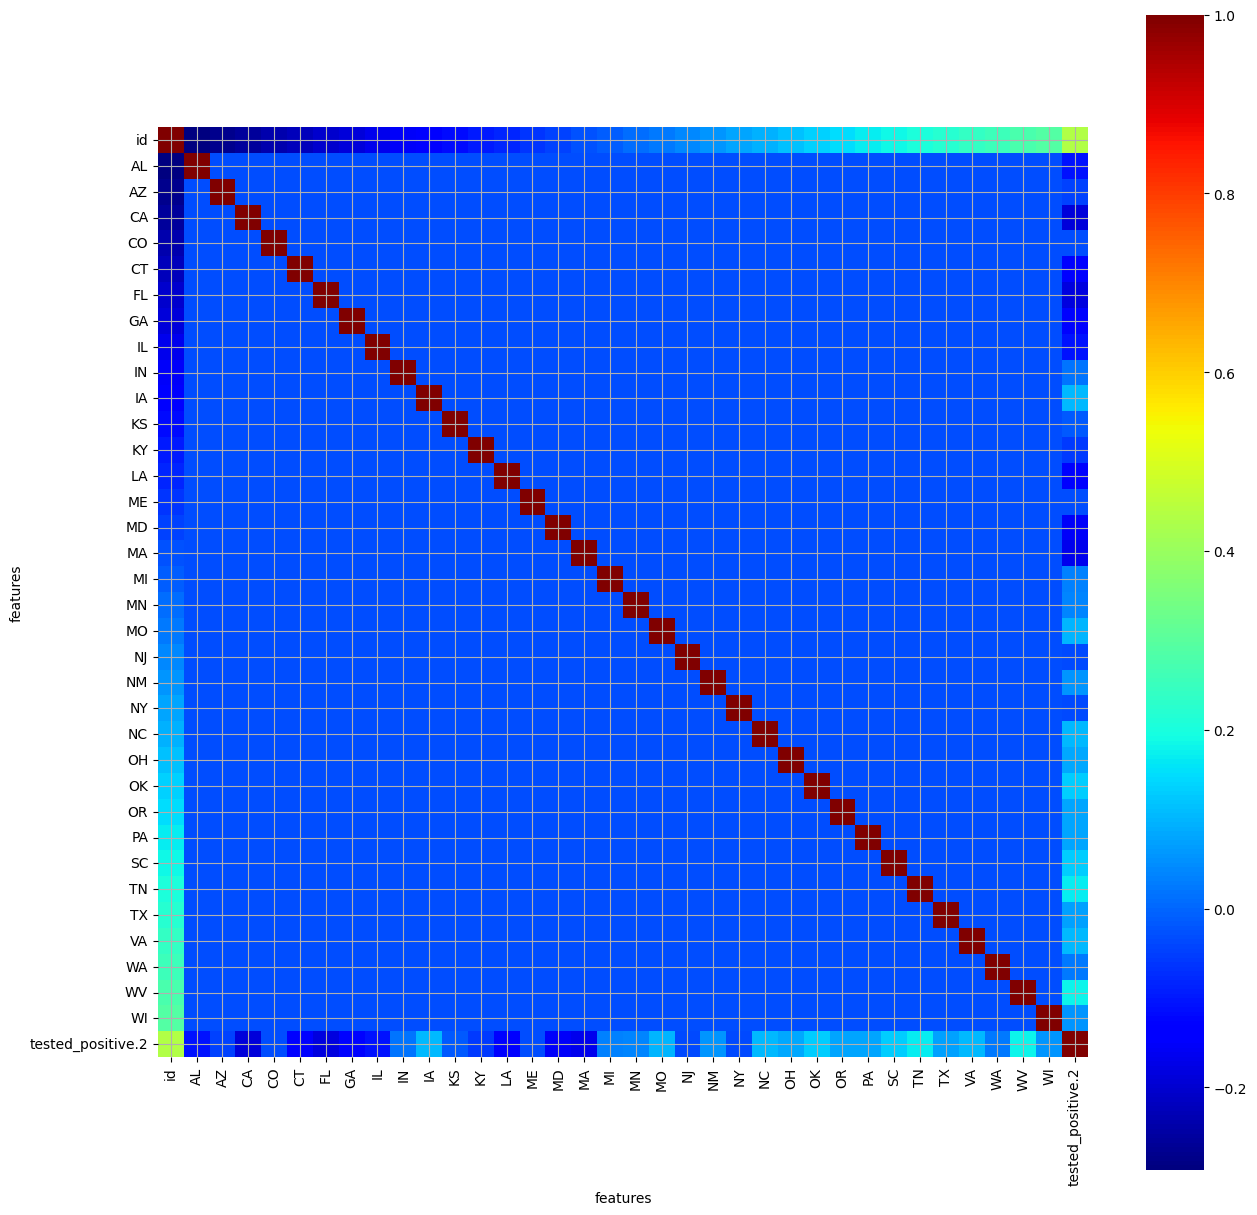

In [22]:
plt.figure(figsize=(15, 15))
sns.heatmap(train_data.iloc[:, list(range(35)) + [-1]].corr(), square=True, cmap="jet")
plt.xlabel("features")
plt.ylabel("features")
plt.grid()
plt.show()

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
column = tested_positive.2
 - mean  : 17.3051
 - sigma : 9.9149
 - min  : 3.0543
 - max  : 46.9525


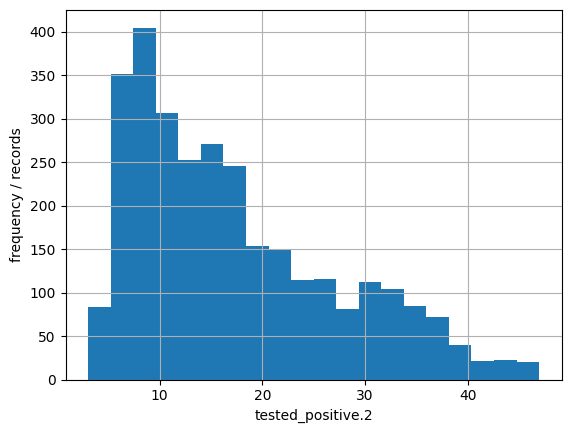

In [23]:
col = "tested_positive.2"
mean_, sgm_ = train_data[col].mean(), np.sqrt(train_data[col].var())
min_, max_ = train_data[col].min(), train_data[col].max()
print("- " * 30)
print(f"column = {col}")
print(f" - mean  : {mean_:.4f}", )
print(f" - sigma : {sgm_:.4f}", )
print(f" - min  : {min_:.4f}", )
print(f" - max  : {max_:.4f}", )

plt.hist(train_data[col], bins=20)
plt.xlabel(col)
plt.ylabel("frequency / records")
#plt.yscale("log")
plt.grid()
plt.show()

In [25]:
a = ['AL', 'AZ', 'CA', 'CO', 'CT', 'FL', 'GA', 'IL', 'IN', 'IA', 'KS',
       'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MO', 'NJ', 'NM', 'NY', 'NC',
       'OH', 'OK', 'OR', 'PA', 'SC', 'TN', 'TX', 'VA', 'WA', 'WV', 'WI']

In [26]:
len(a)

34